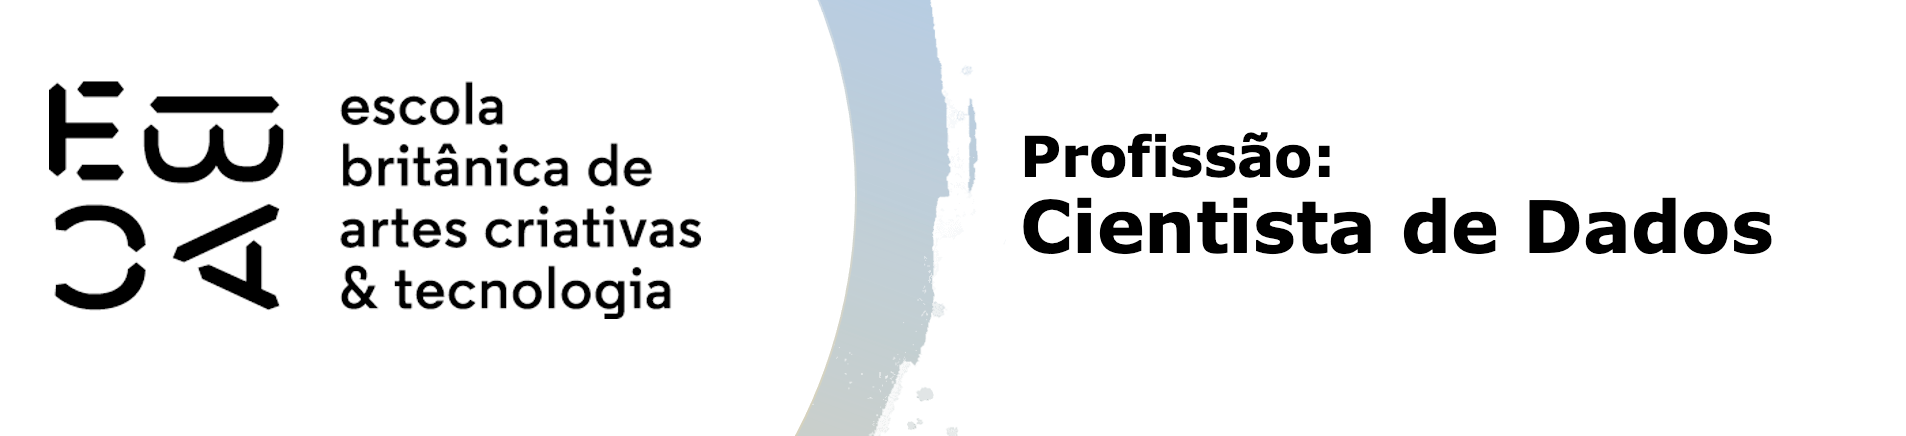

____

### Aluno: Victor Resende

____

# Tarefa

Carregue a base ```NFP.ftr```. Essa base é proveniente do projeto #AMABiliDados, e contém dados da nota fiscal paulista cadastrados para doação automática para a AMA, Associação de Amigos do Autista. 

A *Nota Fiscal Paulista* é um programa de incentivo do governo do estado de São Paulo, que retorna um pedacinho do ICMS ao consumidor sempre que solicita o registro do seu CPF na nota. Nesse programa, o contribuinte pode direcionar seus créditos a uma ONG, e quando faz isso, sempre que faz esse consumidor cadastrado faz uma compra, os créditos de notas emitidas pelo mesmo estabelecimento não identificadas (notas sem CPF) são "arrastados" para a ONG na forma de uma doação.

Clique no link, caso queira saber mais sobre a [AMA](https://www.ama.org.br/site/).<br>
Clique no link, caso queira saber como o cidadão pode ser um [doador da NFP](https://doacao1.ama.org.br/sitenfp).

Essa base possui dados das notas cujos contribuintes direcionaram seus créditos à AMA. Seus campos estão descritos abaixo:

|Campo|Descrição|
|:-|:-|
|CNPJ emit.| CNPJ do emitente da nota|
|Emitente| Nome fantasia do emitente da nota|
|No.| Número da nota fiscal|
|Data Emissão| Data de emissão da nota fiscal|
|Valor NF| Valor da nota fiscal|
|Data Registro| Data de registro no sistema da NFP|
|Créditos| Valor dos créditos (doação)|
|Situação do Crédito| Se o crédito já foi pago, está sendo processado etc.|
|Ano| Ano da emissão da nota|
|Semestre| Semestre da emissão da nota|
|Retorno| Valor do crédito dividido pelo valor da nota|
|flag_credito| Indicadora se a nota possui crédito positivo|
|categoria| Categorização da nota |

**OBJETIVO:** Algumas notas não dão retorno, o que pode ocorrer por diversos motivos, um deles seria a ocorrência de produtos não incentivados como cigarros e bebidas alcólicas. O nosso objetivo é tentar prever que tipo de nota tem maior ou menor propensão a fornecer créditos.

**Observação**: Esta é uma base real, havendo características de acordo. Pode haver uma variabilidade difícil de explicar, em parte por causa de uma freqüência de notas inconstante no tempo (por diversos motivos), em parte por haverem informações importantes, protegidas pela LGPD, não constantes na base, que pode interferir no crédito gerado, o que vai ocasionar uma variabilidade difícil de se explicar. *Welcome to the jungle*, A vida real é assim :)

## Carregando as bibliocas necessárias:

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Carregando os dados:

In [13]:
df = pd.read_pickle('base_nfp.pkl')
df.head()

,CNPJ emit.,Emitente,No.,Data Emissão,Valor NF,Data Registro,Créditos,Situação do Crédito,Ano,Semestre,Retorno,flag_credito,categoria
0,03.476.811/0741-98,DIA BRASIL SOCIEDADE LIMITADA,537,2017-06-30,24.68,2017-06-30,0.00,Liberado,2017,1,0.000000,0,Mercado
1,43.101.310/0001-05,AUTO POSTO ZANWAL LTDA EPP,2894,2017-06-30,50.00,2017-06-30,0.00,Liberado,2017,1,0.000000,0,Auto posto
2,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,699,2017-06-30,27.00,2017-06-30,0.44,Liberado,2017,1,0.016296,1,Restaurantes
3,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,698,2017-06-30,111.50,2017-06-30,1.81,Liberado,2017,1,0.016233,1,Restaurantes
4,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,694,2017-06-30,125.00,2017-06-30,2.03,Liberado,2017,1,0.016240,1,Restaurantes


## Análise da probabilidade de retorno

Considere somente os dados de janeiro de 2020 em diante para esta análise.

- Analise a proporção de notas que tiveram retorno>0 por categoria de estabelecimento. Esta análise pode ser por tabela ou gráfico.

C:\Users\User\AppData\Local\Temp\ipykernel_14104\4001995278.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Retorno_Flag'] = df_filtered['Retorno'] > 0


      Categoria  Proporção Retorno > 0
0  Restaurantes               0.746214
1     Alimentos               0.681584
2       Mercado               0.478155
3    Construção               0.468810
4  não definido               0.363394
5      Farmácia               0.351556
6    Auto posto               0.250000
7     Vestuário               0.230729
8        Varejo               0.138373


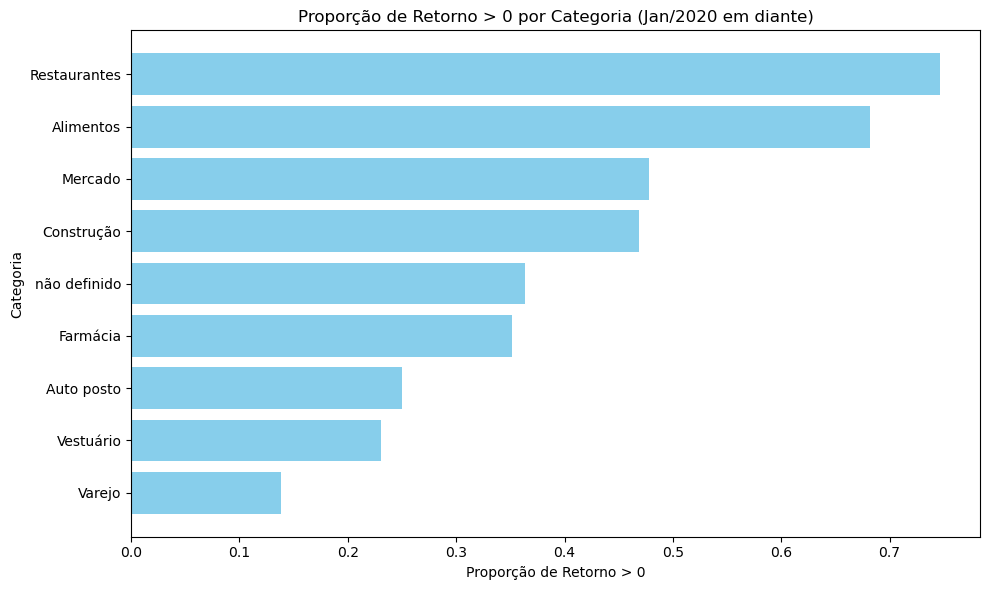

In [79]:
# Converter a coluna de datas para o formato datetime
df['Data Emissão'] = pd.to_datetime(df['Data Emissão'])

# Filtrar os dados para janeiro de 2020 em diante
df_filtered = df[df['Data Emissão'] >= '2020-01-01']

# Criar a coluna flag para indicar se o retorno foi maior que 0
df_filtered['Retorno_Flag'] = df_filtered['Retorno'] > 0

# Calcular a proporção de retorno por categoria
proportion_by_category = df_filtered.groupby('categoria')['Retorno_Flag'].mean().sort_values(ascending=False)

# Converter para DataFrame para exibição tabular
proportion_table = proportion_by_category.reset_index()
proportion_table.columns = ['Categoria', 'Proporção Retorno > 0']

# Exibir a tabela
print(proportion_table)

# Plotar o gráfico
plt.figure(figsize=(10, 6))
plt.barh(proportion_by_category.index, proportion_by_category.values, color='skyblue')
plt.xlabel('Proporção de Retorno > 0')
plt.ylabel('Categoria')
plt.title('Proporção de Retorno > 0 por Categoria (Jan/2020 em diante)')
plt.gca().invert_yaxis()  # Inverter eixo Y para ordenar do maior para o menor
plt.tight_layout()
plt.show()


## Cálculo do WOE

- Calcule o WOE das categorias, sendo que o evento em questão é a nota ter retorno>0.
- Analise este WOE por tabela e por gráfico.

      categoria   good    bad  good_dist  bad_dist       WOE
0  Restaurantes   1626    553   0.043571  0.011141  1.363801
1     Alimentos   3442   1608   0.092234  0.032395  1.046342
2       Mercado  13177  14381   0.353100  0.289718  0.197846
3    Construção   7523   8524   0.201592  0.171723  0.160360
4  não definido   6689  11718   0.179243  0.236069 -0.275381
5      Farmácia   3582   6607   0.095986  0.133104 -0.326928
6    Auto posto    135    405   0.003618  0.008159 -0.813331
7     Vestuário    443   1477   0.011871  0.029755 -0.918918
8        Varejo    701   4365   0.018785  0.087937 -1.543585


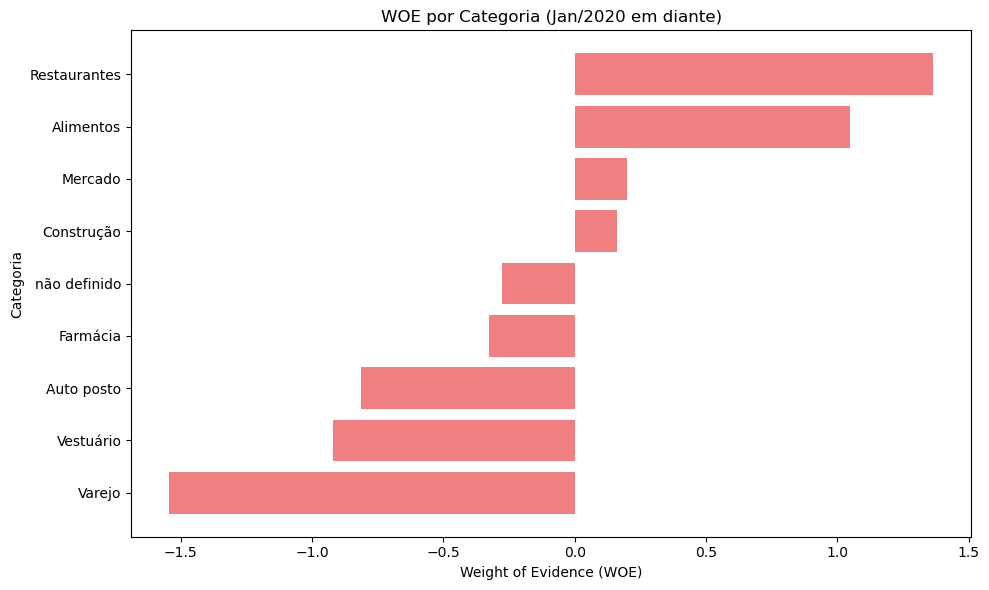

In [71]:
# Calcular os totais gerais
total_good = df_filtered['Retorno_Flag'].sum()
total_bad = (~df_filtered['Retorno_Flag']).sum()

# Agrupar por categoria e calcular os totais por categoria
category_stats = df_filtered.groupby('categoria')['Retorno_Flag'].agg(['sum', 'count'])
category_stats['good'] = category_stats['sum']  # Total de retornos > 0
category_stats['bad'] = category_stats['count'] - category_stats['good']  # Total de retornos == 0

# Calcular proporções para WOE
category_stats['good_dist'] = category_stats['good'] / total_good
category_stats['bad_dist'] = category_stats['bad'] / total_bad
category_stats['WOE'] = np.log(category_stats['good_dist'] / category_stats['bad_dist'])

# Ordenar por WOE
category_stats = category_stats.sort_values(by='WOE', ascending=False)

# Exibir a tabela relevante
woe_table = category_stats[['good', 'bad', 'good_dist', 'bad_dist', 'WOE']].reset_index()
print(woe_table)

# Plotar o gráfico de WOE
plt.figure(figsize=(10, 6))
plt.barh(category_stats.index, category_stats['WOE'], color='lightcoral')
plt.xlabel('Weight of Evidence (WOE)')
plt.ylabel('Categoria')
plt.title('WOE por Categoria (Jan/2020 em diante)')
plt.gca().invert_yaxis()  # Inverter eixo Y para ordenar do maior para o menor
plt.tight_layout()
plt.show()


## Cálculo do *Information Value*

Calcule o *IV* dessa variável.

In [41]:
# Calcular o IV
category_stats['IV'] = (category_stats['good_dist'] - category_stats['bad_dist']) * category_stats['WOE']

# Somar os valores de IV por categoria
information_value = category_stats['IV'].sum()

print(f"Information Value (IV) da variável 'categoria': {information_value:.4f}")

# Interpretação do IV
if information_value < 0.02:
    print("A variável tem relevância irrelevante para discriminação.")
elif information_value < 0.1:
    print("A variável tem força preditiva fraca.")
elif information_value < 0.3:
    print("A variável tem força preditiva média.")
elif information_value < 0.5:
    print("A variável tem força preditiva forte.")
else:
    print("A variável tem força preditiva suspeita. Pode haver overfitting.")


Information Value (IV) da variável 'categoria': 0.2788
A variável tem força preditiva média.


___________

## <font color='red'> Conclusões

- **Observamos várias atividades com NF com retorno positivo como: <font color='blue'> restaurantes, alimentos, mercado, construção, farmácia, autoposto e vestuário.**
- **Quando aplicamos o WOE filtramos ainda mais nosso dados e verificamos as atividades mais propensas a terem NF com retorno positivo como: <font color='green'>restaurantes, alimentos, mercado e construção.**
- **Sugerimos, então, contar com essas atividades, bem como incentivar outras atividades comerciais a adotar o projeto #AMABiliDados.**